In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto import plotting

In [2]:
def get_grid(n_node):

    x = np.linspace(0, 1, n_node)

    points = []
    for i in range(n_node):
        for j in range(n_node):
            points.append([x[j], x[i]])

    tri = Delaunay(points)

    edge_list = []
    for t in tri.simplices:
        edge_list.append([t[0], t[1]])
        edge_list.append([t[0], t[2]])
        edge_list.append([t[1], t[2]])

    graph = nx.Graph()
    graph.add_nodes_from(np.arange(len(points)))
    graph.add_edges_from(edge_list)
    return graph, points

{(0, 1): Text(0.125, 0.0, '0'),
 (0, 5): Text(0.0, 0.125, '1'),
 (1, 5): Text(0.125, 0.125, '2'),
 (1, 6): Text(0.25, 0.125, '3'),
 (1, 7): Text(0.375, 0.125, '4'),
 (1, 2): Text(0.375, 0.0, '5'),
 (2, 7): Text(0.5, 0.125, '6'),
 (2, 3): Text(0.625, 0.0, '7'),
 (3, 9): Text(0.875, 0.125, '8'),
 (3, 4): Text(0.875, 0.0, '9'),
 (3, 8): Text(0.75, 0.125, '10'),
 (3, 7): Text(0.625, 0.125, '11'),
 (4, 9): Text(1.0, 0.125, '12'),
 (5, 6): Text(0.125, 0.25, '13'),
 (5, 11): Text(0.125, 0.375, '14'),
 (5, 10): Text(0.0, 0.375, '15'),
 (6, 11): Text(0.25, 0.375, '16'),
 (6, 7): Text(0.375, 0.25, '17'),
 (7, 11): Text(0.375, 0.375, '18'),
 (7, 12): Text(0.5, 0.375, '19'),
 (7, 8): Text(0.625, 0.25, '20'),
 (7, 13): Text(0.625, 0.375, '21'),
 (8, 9): Text(0.875, 0.25, '22'),
 (8, 13): Text(0.75, 0.375, '23'),
 (9, 13): Text(0.875, 0.375, '24'),
 (9, 14): Text(1.0, 0.375, '25'),
 (10, 11): Text(0.125, 0.5, '26'),
 (10, 15): Text(0.0, 0.625, '27'),
 (11, 15): Text(0.125, 0.625, '28'),
 (11, 16): T

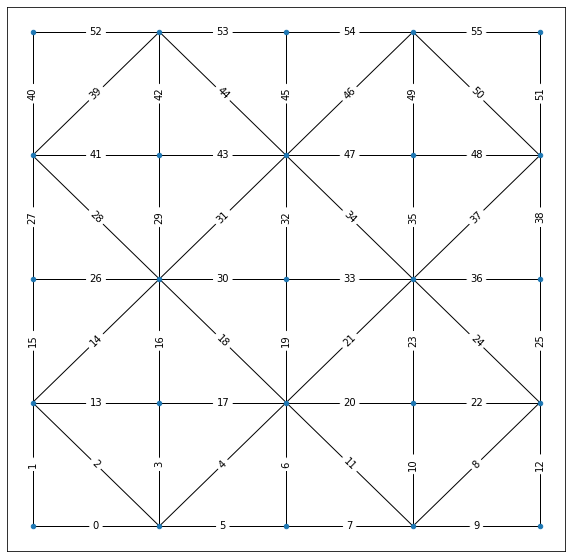

In [3]:
graph, points = get_grid(5)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=20)
nx.draw_networkx_edges(graph, pos=points)

labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))
nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

# Fixed number of faces, changing initial conditions

In [73]:
def complex_info(complex_delaunay,edge_result):
    B0 = complex_delaunay.node_incidence_matrix
    W0 = complex_delaunay.node_weights_matrix
    B1 = complex_delaunay.edge_incidence_matrix
    W1 = complex_delaunay.edge_weights_matrix
    W2 = complex_delaunay.face_weights_matrix
    omega_0 = np.zeros(complex_delaunay.n_edges)

    Ld = W1.dot(B0.dot(W0.dot(B0.T)))
    Lu = W1.dot(B1.T.dot(W2.dot(B1)))

    L1 = Ld + Lu

    mod_sol=np.mod(np.around(L1.dot(edge_result.y[:,-1]), 10), np.around(2*np.pi, 10))
    print(mod_sol)
    print(np.mod(np.around(L1.dot(edge_result.y[:,-1]).sum(), 10), np.around(2*np.pi, 10)))

    print(sc.linalg.null_space(L1.todense()).shape[1])

In [85]:
mu=np.pi
sigma=np.linspace(0,0.01,10)

t_max = 100
n_t = 10

all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

n_repeats = 5
N_faces=[0,11,22,32]
N_flip=0

order = np.zeros([len(sigma),len(N_faces),n_repeats])

for si,s in enumerate(sigma):
    print(s)
    for nfi,nf in enumerate(N_faces):
        print(nf)
        for k in range(0,n_repeats):
            initial_phase = np.random.normal(mu,s,len(graph.edges))
#             randomly flip 10 edges
            for j in range(N_flip):
                print(j)
                initial_phase[np.random.randint(1,len(graph.edges))] = np.pi 
            
            rand_faces = random.sample(faces, int(nf))
            complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=rand_faces)
            
            edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)

#             complex_info(complex_delaunay,edge_result)
            
            op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)        
            order[si,nfi,k]=op[-1]
#             order_repeat.append(op[-1])

#         order_sigma.append(order_repeat)
#     order.append(order_sigma)

0.0
0
11
22
32
0.0011111111111111111
0
11
22
32
0.0022222222222222222
0
11
22
32
0.003333333333333333
0
11
22
32
0.0044444444444444444
0
11
22
32
0.005555555555555556
0
11
22
32
0.006666666666666666
0
11
22
32
0.0077777777777777776
0
11
22
32
0.008888888888888889
0
11
22
32
0.01
0
11
22
32


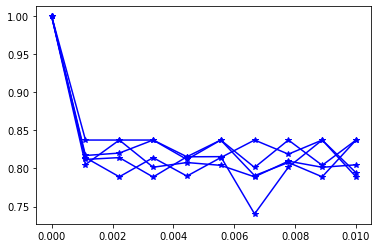

In [86]:
plt.plot(sigma,np.squeeze(order[:,0,:]),'b*-')

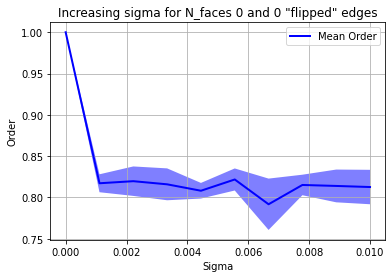

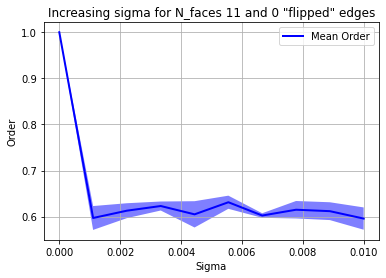

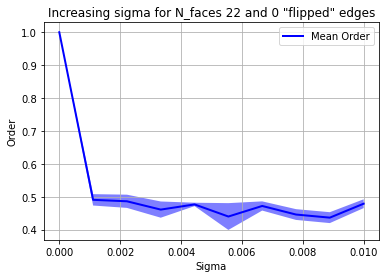

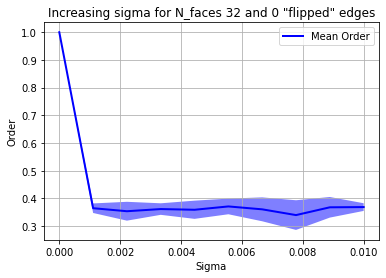

In [89]:
# mean_order = np.array([np.mean(l) for l in order])
# std_order = np.array([np.std(l) for l in order])
for nfi,nf in enumerate(N_faces):
    mean_order=np.mean(np.squeeze(order[:,nfi,:]),1)
    std_order=np.std(np.squeeze(order[:,nfi,:]),1)

    fig, ax = plt.subplots(1)
    ax.plot(sigma, mean_order, lw=2, label='Mean Order', color='blue')
    ax.fill_between(sigma, mean_order+std_order, mean_order-std_order, facecolor='blue', alpha=0.5)
    ax.set_title('Increasing sigma for N_faces '+str(nf)+' and '+str(N_flip)+' "flipped" edges')
    ax.legend(loc='upper right')
    ax.set_xlabel('Sigma')
    ax.set_ylabel('Order')
    ax.grid()
    plt.savefig(str(nf)+'.png')